# Plot the spectrugrams of the three components of one station

In [179]:
# Import modules

from obspy import read, UTCDateTime, Stream
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta
from os.path import join

from utils_basic import ROOTDIR, INNER_STATIONS_A, INNER_STATIONS_B, days_to_timestamps
from utils_preproc import preprocess_stream
from utils_sta_lta import read_associated_events
from scipy.signal import spectrogram

In [180]:
# Inputs
## Station and time window
station = "B04"
starttime = Timestamp("2020-01-11T19:40:20")
dur = 2.5 # in seconds

## processing parameters
freqmin = 10.0
freqmax = 450.0

## Sepctrogram parameters
nperseg = 128
noverlap = 96

## Plotting parameters
velmax = 2.5e4


In [181]:
# Read and preprocess the data
starttime = UTCDateTime(starttime)
timewin = starttime.strftime("%Y-%m-%d-%H-00-00")
stream = Stream()
try:
    pattern = join(ROOTDIR, timewin, f"*{station}*.SAC")
    stream = read(pattern)
except:
    raise ValueError(f"No data found for {station} at {timewin}")
    
stream = preprocess_stream(stream, freqmin, freqmax)
stream.trim(starttime, starttime + dur)

3 Trace(s) in Stream:
7F.B04..GH1 | 2020-01-11T19:40:20.000148Z - 2020-01-11T19:40:22.500148Z | 1000.0 Hz, 2501 samples
7F.B04..GH2 | 2020-01-11T19:40:20.000148Z - 2020-01-11T19:40:22.500148Z | 1000.0 Hz, 2501 samples
7F.B04..GHZ | 2020-01-11T19:40:20.000148Z - 2020-01-11T19:40:22.500148Z | 1000.0 Hz, 2501 samples

In [182]:
# Compute the spectrogram
trace_z = stream.select(channel="*Z")[0]
trace_1 = stream.select(channel="*1")[0]
trace_2 = stream.select(channel="*2")[0]

data_z = trace_z.data
data_1 = trace_1.data
data_2 = trace_2.data

samprat = trace_z.stats.sampling_rate
nyquist = samprat / 2.0

freqax, timeax, spec_z = spectrogram(data_z, fs=samprat, nperseg=nperseg, noverlap=noverlap)
freqax, timeax, spec_1 = spectrogram(data_1, fs=samprat, nperseg=nperseg, noverlap=noverlap)
freqax, timeax, spec_2 = spectrogram(data_2, fs=samprat, nperseg=nperseg, noverlap=noverlap)

Saved /Volumes/OmanData/geophones_no_prefilt/data/2020-01-11-19-00-00/spectrograms_B04.png


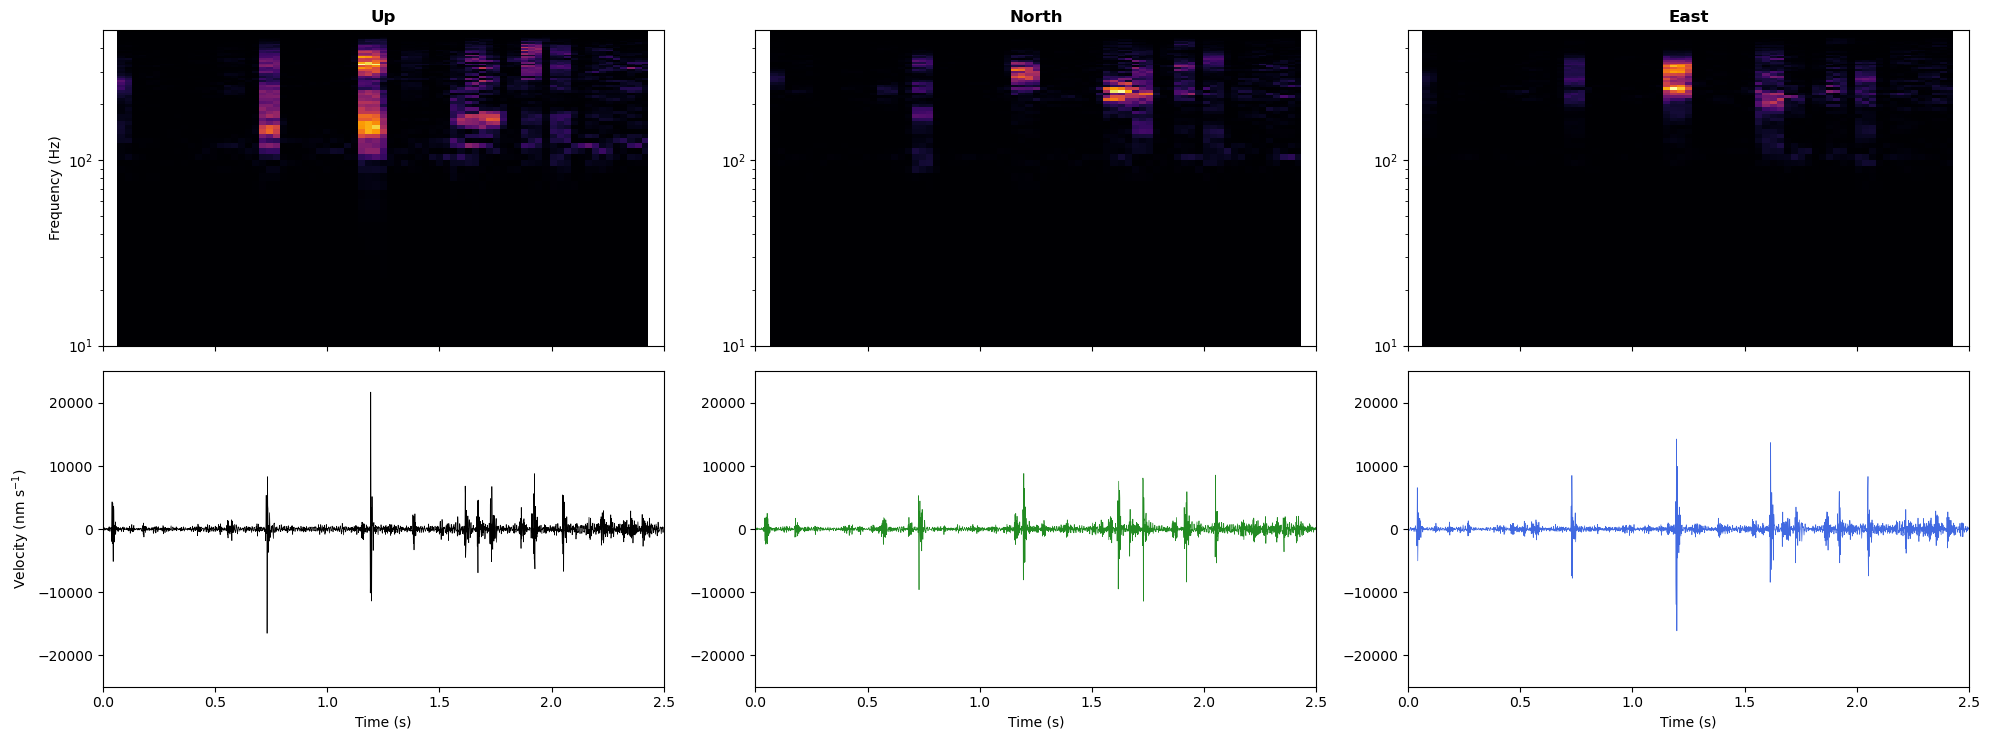

In [183]:
# Plot the spectrograms and the waveforms
fig, axes = subplots(2, 3, figsize=(20, 7.5), sharex=True)

## Spectrograms
axes[0, 0].imshow(spec_z, aspect="auto", cmap="inferno", extent=[timeax[0], timeax[-1], freqax[0], freqax[-1]], origin="lower")
axes[0, 0].set_yscale("log")
axes[0, 0].set_ylim(freqmin, freqax[-1])
axes[0, 0].set_ylabel("Frequency (Hz)")
axes[0, 0].set_title("Up", fontweight="bold")

axes[0, 1].imshow(spec_1, aspect="auto", cmap="inferno", extent=[timeax[0], timeax[-1], freqax[0], freqax[-1]], origin="lower")
axes[0, 1].set_yscale("log")
axes[0, 1].set_ylim(freqmin, freqax[-1])
axes[0, 1].set_title("North", fontweight="bold")

axes[0, 2].imshow(spec_2, aspect="auto", cmap="inferno", extent=[timeax[0], timeax[-1], freqax[0], freqax[-1]], origin="lower")
axes[0, 2].set_yscale("log")
axes[0, 2].set_ylim(freqmin, freqax[-1])
axes[0, 2].set_title("East", fontweight="bold")

## Waveforms
axes[1, 0].plot(trace_z.times(), trace_z.data, color="black", linewidth=0.5)
axes[1, 0].set_xlim(0, dur)
axes[1, 0].set_ylim(-velmax, velmax)
axes[1, 0].set_xlabel("Time (s)")
axes[1, 0].set_ylabel("Velocity (nm s$^{-1}$)")

axes[1, 1].plot(trace_1.times(), trace_1.data, color="forestgreen", linewidth=0.5)
axes[1, 1].set_xlim(0, dur)
axes[1, 1].set_ylim(-velmax, velmax)
axes[1, 1].set_xlabel("Time (s)")

axes[1, 2].plot(trace_2.times(), trace_2.data, color="royalblue", linewidth=0.5)
axes[1, 2].set_xlim(0, dur)
axes[1, 2].set_ylim(-velmax, velmax)
axes[1, 2].set_xlabel("Time (s)")

# Save the figure
fig.tight_layout()
fig.patch.set_alpha(0)

outpath = join(ROOTDIR, timewin, f"spectrograms_{station}.png")
fig.savefig(outpath, dpi=300)
print(f"Saved {outpath}")

